In [1]:
library(dplyr)
library(tidyr)
library(caret)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Always start with loading in the libraries that might be needed. 

## Then load in the datasets to use. 

In [3]:
library(readxl)
CrimeByNumber81_00 <- read_excel("C:/Users/rebec/OneDrive/Documents/DataScience/DSO110FinalGroupProject/Week2/Crime By Number 1981-2000.xls")
CrimeByNumber81_00

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ... and 8 more problems


Table 1,...2,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14
Index of Crime,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
"United States, 1981-2000",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Population1,Crime Index total,Modified Crime Index total2,Violent crime3,Property crime3,Murder and non- negligent man- slaughter,Forcible rape,Robbery,Aggravated assault,Burglary,Larceny-theft,Motor vehicle theft,Arson2,NA
Number of Offenses,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Population by year:,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
"1981-229,465,714",13423800,NA,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800,NA,NA
"1982-231,664,458",12974400,NA,1322390,11652000,21010,78770,553130,669480,3447100,7142500,1062400,NA,NA
"1983-233,791,994",12108630,NA,1258087,10850543,19308,78918,506567,653294,3129851,6712759,1007933,NA,NA


### That is one messy looking table. Lets clean it up.

In [4]:
### Lets trim this down to the data that we need
CrimeByNumber81_99 <- CrimeByNumber81_00[8:26, 1:12]

In [5]:
## Now lets rename all the columns 
colnames(CrimeByNumber81_99) = c("Year/Population", "CrimeIndexTotal", "ModifiedCrimeIndex", "ViolentCrime", "PropertyCrime", 
                                 "Murder/NonNegligentManslaughter", "Rape", "Robbery", "AggravatedAssault", 
                                 "Burglary", "Larceny/Theft", "MotorVehicleTheft")

In [6]:
#Separating the Year from the Population
CrimeByNumber81_99A <- separate(CrimeByNumber81_99, "Year/Population", c("Year", "Population"), sep= "-")

In [7]:
CrimeByNumber81_99A

Year,Population,CrimeIndexTotal,ModifiedCrimeIndex,ViolentCrime,PropertyCrime,Murder/NonNegligentManslaughter,Rape,Robbery,AggravatedAssault,Burglary,Larceny/Theft,MotorVehicleTheft
1981,"229,465,714",13423800,NA,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800
1982,"231,664,458",12974400,NA,1322390,11652000,21010,78770,553130,669480,3447100,7142500,1062400
1983,"233,791,994",12108630,NA,1258087,10850543,19308,78918,506567,653294,3129851,6712759,1007933
1984,"235,824,902",11881755,NA,1273282,10608473,18692,84233,485008,685349,2984434,6591874,1032165
1985,"237,923,795",12430357,NA,1327767,11102590,18976,87671,497874,723246,3073348,6926380,1102862
1986,"240,132,887",13211869,NA,1489169,11722700,20613,91459,542775,834322,3241410,7257153,1224137
1987,"242,288,918",13508708,NA,1483999,12024709,20096,91111,517704,855088,3236184,7499851,1288674
1988,"244,498,982",13923086,NA,1566221,12356865,20675,92486,542968,910092,3218077,7705872,1432916
1989,"246,819,230",14251449,NA,1646037,12605412,21500,94504,578326,951707,3168170,7872442,1564800
1990,"249,464,396",14475613,NA,1820127,12655486,23438,102555,639271,1054863,3073909,7945670,1635907


## Load in the Dataset Table_1_Crime_in_the_United_States_by_Volume_and_Rate_per_100000_Inhabitants_2000_2019

In [8]:
CrimeByNumber00_19 <- read_excel("C:/Users/rebec/OneDrive/Documents/DataScience/DSO110FinalGroupProject/Week2/Data Tables/Table_1_Crime_in_the_United_States_by_Volume_and_Rate_per_100000_Inhabitants_2000-2019.xls")
CrimeByNumber00_19

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ... and 18 more problems


Table 1,...2,...3,...4,...5,...6,...7,...8,...9,...10,...,...15,...16,...17,...18,...19,...20,...21,...22,...23,...24
Crime in the United States,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
"by Volume and Rate per 100,000 Inhabitants, 2000–2019",NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition)3,Rape (revised definition) rate3,Rape (legacy definition)4,Rape (legacy definition) rate4,...,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate,NA,NA
2000,281421906,1425486,506.5,15586,5.5,NA,NA,90178,32,...,10182584,3618.3000000000002,2050992,728.79999999999995,6971590,2477.3000000000002,1160002,412.19999999999999,NA,NA
20015,285317559,1439480,504.5,16037,5.5999999999999996,NA,NA,90863,31.800000000000001,...,10437189,3658.0999999999999,2116531,741.79999999999995,7092267,2485.6999999999998,1228391,430.5,NA,NA
2002,287973924,1423677,494.39999999999998,16229,5.5999999999999996,NA,NA,95235,33.100000000000001,...,10455277,3630.5999999999999,2151252,747,7057379,2450.6999999999998,1246646,432.89999999999998,NA,NA
2003,290788976,1383676,475.80000000000001,16528,5.7000000000000002,NA,NA,93883,32.299999999999997,...,10442862,3591.1999999999998,2154834,741,7026802,2416.5,1261226,433.69999999999999,NA,NA
2004,293656842,1360088,463.19999999999999,16148,5.5,NA,NA,95089,32.399999999999999,...,10319386,3514.0999999999999,2144446,730.29999999999995,6937089,2362.3000000000002,1237851,421.5,NA,NA
2005,296507061,1390745,469,16740,5.5999999999999996,NA,NA,94347,31.800000000000001,...,10174754,3431.5,2155448,726.89999999999998,6783447,2287.8000000000002,1235859,416.80000000000001,NA,NA
2006,299398484,1435123,479.30000000000001,17309,5.7999999999999998,NA,NA,94472,31.600000000000001,...,10019601,3346.5999999999999,2194993,733.10000000000002,6626363,2213.1999999999998,1198245,400.19999999999999,NA,NA


In [9]:
## Lets trim this down to what we need
CrimeByNumber00_19 <- CrimeByNumber00_19[4:23, 1:22]

In [10]:
##Now to rename these columns
colnames(CrimeByNumber00_19) = c("Year", "Population", "ViolentCrime", "ViolentCrimeRate", "Murder/NonNegligentManslaughter",
                                 "Murder/NonNegligentManslaughterRate", "Rape/Revised", "Rape/RevisedRate", "Rape", "RapeRate", 
                                 "Robbery", "RobberyRate", "AggravatedAssault", "AggravatedAssaultRate", "PropertyCrime",
                                 "PropertyCrimeRate", "Burglary", "BurglaryRate", "Larceny/Theft", "Larceny/TheftRate",
                                 "MotorVehicleTheft", "MotorVehicleTheftRate")

In [11]:
#Lets subset 00_19 to only have the same info as 81_00
keeps<- c("Year", "ViolentCrime", "Murder/NonNegligentManslaughter", "Rape", "Robbery", "AggravatedAssault", "PropertyCrime",
          "Burglary", "Larceny/Theft", "MotorVehicleTheft")

In [12]:
CrimeByNumber00_19A <- CrimeByNumber00_19[keeps]
CrimeByNumber81_99B <- CrimeByNumber81_99A[keeps]

In [13]:
CrimeByNumber00_19A

Year,ViolentCrime,Murder/NonNegligentManslaughter,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny/Theft,MotorVehicleTheft
2000,1425486,15586,90178,408016,911706,10182584,2050992,6971590,1160002
20015,1439480,16037,90863,423557,909023,10437189,2116531,7092267,1228391
2002,1423677,16229,95235,420806,891407,10455277,2151252,7057379,1246646
2003,1383676,16528,93883,414235,859030,10442862,2154834,7026802,1261226
2004,1360088,16148,95089,401470,847381,10319386,2144446,6937089,1237851
2005,1390745,16740,94347,417438,862220,10174754,2155448,6783447,1235859
2006,1435123,17309,94472,449246,874096,10019601,2194993,6626363,1198245
2007,1422970,17128,92160,447324,866358,9882212,2190198,6591542,1100472
2008,1394461,16465,90750,443563,843683,9774152,2228887,6586206,959059
2009,1325896,15399,89241,408742,812514,9337060,2203313,6338095,795652


In [14]:
## Lets Combine all this into one
CrimeByNumber81_19 <-rbind(CrimeByNumber81_99B, CrimeByNumber00_19A)

In [15]:
## Lets Look at this dataset now
CrimeByNumber81_19

Year,ViolentCrime,Murder/NonNegligentManslaughter,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny/Theft,MotorVehicleTheft
1981,1361820,22520,82500,592910,663900,12061900,3779700,7194400,1087800
1982,1322390,21010,78770,553130,669480,11652000,3447100,7142500,1062400
1983,1258087,19308,78918,506567,653294,10850543,3129851,6712759,1007933
1984,1273282,18692,84233,485008,685349,10608473,2984434,6591874,1032165
1985,1327767,18976,87671,497874,723246,11102590,3073348,6926380,1102862
1986,1489169,20613,91459,542775,834322,11722700,3241410,7257153,1224137
1987,1483999,20096,91111,517704,855088,12024709,3236184,7499851,1288674
1988,1566221,20675,92486,542968,910092,12356865,3218077,7705872,1432916
1989,1646037,21500,94504,578326,951707,12605412,3168170,7872442,1564800
1990,1820127,23438,102555,639271,1054863,12655486,3073909,7945670,1635907


In [16]:
## lets see what format this data is in
str(CrimeByNumber81_19)

Classes 'tbl_df', 'tbl' and 'data.frame':	39 obs. of  10 variables:
 $ Year                           : chr  "1981" "1982" "1983" "1984" ...
 $ ViolentCrime                   : chr  "1361820" "1322390" "1258087" "1273282" ...
 $ Murder/NonNegligentManslaughter: chr  "22520" "21010" "19308" "18692" ...
 $ Rape                           : chr  "82500" "78770" "78918" "84233" ...
 $ Robbery                        : chr  "592910" "553130" "506567" "485008" ...
 $ AggravatedAssault              : chr  "663900" "669480" "653294" "685349" ...
 $ PropertyCrime                  : chr  "12061900" "11652000" "10850543" "10608473" ...
 $ Burglary                       : chr  "3779700" "3447100" "3129851" "2984434" ...
 $ Larceny/Theft                  : chr  "7194400" "7142500" "6712759" "6591874" ...
 $ MotorVehicleTheft              : chr  "1087800" "1062400" "1007933" "1032165" ...


In [17]:
## All of the data seems to be in chr format, let me turn that in to num
CrimeByNumber81_19$Year <- as.numeric(CrimeByNumber81_19$Year)
CrimeByNumber81_19$ViolentCrime <- as.numeric(CrimeByNumber81_19$ViolentCrime)
CrimeByNumber81_19$`Murder/NonNegligentManslaughter` <- as.numeric(CrimeByNumber81_19$`Murder/NonNegligentManslaughter`)
CrimeByNumber81_19$Rape <- as.numeric(CrimeByNumber81_19$Rape)
CrimeByNumber81_19$Robbery <- as.numeric(CrimeByNumber81_19$Robbery)
CrimeByNumber81_19$AggravatedAssault <- as.numeric(CrimeByNumber81_19$AggravatedAssault)
CrimeByNumber81_19$PropertyCrime <- as.numeric(CrimeByNumber81_19$PropertyCrime)
CrimeByNumber81_19$Burglary <- as.numeric(CrimeByNumber81_19$Burglary)
CrimeByNumber81_19$`Larceny/Theft` <- as.numeric(CrimeByNumber81_19$`Larceny/Theft`)
CrimeByNumber81_19$MotorVehicleTheft <- as.numeric(CrimeByNumber81_19$MotorVehicleTheft)

In [18]:
str(CrimeByNumber81_19)

Classes 'tbl_df', 'tbl' and 'data.frame':	39 obs. of  10 variables:
 $ Year                           : num  1981 1982 1983 1984 1985 ...
 $ ViolentCrime                   : num  1361820 1322390 1258087 1273282 1327767 ...
 $ Murder/NonNegligentManslaughter: num  22520 21010 19308 18692 18976 ...
 $ Rape                           : num  82500 78770 78918 84233 87671 ...
 $ Robbery                        : num  592910 553130 506567 485008 497874 ...
 $ AggravatedAssault              : num  663900 669480 653294 685349 723246 ...
 $ PropertyCrime                  : num  12061900 11652000 10850543 10608473 11102590 ...
 $ Burglary                       : num  3779700 3447100 3129851 2984434 3073348 ...
 $ Larceny/Theft                  : num  7194400 7142500 6712759 6591874 6926380 ...
 $ MotorVehicleTheft              : num  1087800 1062400 1007933 1032165 1102862 ...


In [19]:
CrimeByNumber81_19

Year,ViolentCrime,Murder/NonNegligentManslaughter,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny/Theft,MotorVehicleTheft
1981,1361820,22520,82500,592910,663900,12061900,3779700,7194400,1087800
1982,1322390,21010,78770,553130,669480,11652000,3447100,7142500,1062400
1983,1258087,19308,78918,506567,653294,10850543,3129851,6712759,1007933
1984,1273282,18692,84233,485008,685349,10608473,2984434,6591874,1032165
1985,1327767,18976,87671,497874,723246,11102590,3073348,6926380,1102862
1986,1489169,20613,91459,542775,834322,11722700,3241410,7257153,1224137
1987,1483999,20096,91111,517704,855088,12024709,3236184,7499851,1288674
1988,1566221,20675,92486,542968,910092,12356865,3218077,7705872,1432916
1989,1646037,21500,94504,578326,951707,12605412,3168170,7872442,1564800
1990,1820127,23438,102555,639271,1054863,12655486,3073909,7945670,1635907


In [20]:
## There seems to be a few problems in the year column, lets fix those really fast
CrimeByNumber81_19[21, 1] <- 2001
CrimeByNumber81_19[38, 1] <- 2018

In [21]:
CrimeByNumber81_19

Year,ViolentCrime,Murder/NonNegligentManslaughter,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny/Theft,MotorVehicleTheft
1981,1361820,22520,82500,592910,663900,12061900,3779700,7194400,1087800
1982,1322390,21010,78770,553130,669480,11652000,3447100,7142500,1062400
1983,1258087,19308,78918,506567,653294,10850543,3129851,6712759,1007933
1984,1273282,18692,84233,485008,685349,10608473,2984434,6591874,1032165
1985,1327767,18976,87671,497874,723246,11102590,3073348,6926380,1102862
1986,1489169,20613,91459,542775,834322,11722700,3241410,7257153,1224137
1987,1483999,20096,91111,517704,855088,12024709,3236184,7499851,1288674
1988,1566221,20675,92486,542968,910092,12356865,3218077,7705872,1432916
1989,1646037,21500,94504,578326,951707,12605412,3168170,7872442,1564800
1990,1820127,23438,102555,639271,1054863,12655486,3073909,7945670,1635907


# Now lets start asking some questions:
## What has impacted violent crime rates the most in the last nearly 40 years?

### Lets do some stepwise regression to see what we can find out.

In [22]:
## Baseline
FitAllViolent = lm(ViolentCrime ~ ., data= CrimeByNumber81_19)
summary(FitAllViolent)


Call:
lm(formula = ViolentCrime ~ ., data = CrimeByNumber81_19)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6959 -0.3032  0.1672  0.5824  2.6164 

Coefficients: (1 not defined because of singularities)
                                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)                        1.819e+02  1.753e+02     1.038    0.308    
Year                              -8.401e-02  8.713e-02    -0.964    0.343    
`Murder/NonNegligentManslaughter`  9.995e-01  3.590e-04  2784.324   <2e-16 ***
Rape                               1.000e+00  1.337e-04  7480.529   <2e-16 ***
Robbery                            1.000e+00  1.525e-05 65574.996   <2e-16 ***
AggravatedAssault                  1.000e+00  1.022e-05 97859.499   <2e-16 ***
PropertyCrime                      3.095e-06  4.540e-06     0.682    0.501    
Burglary                          -2.774e-06  4.451e-06    -0.623    0.538    
`Larceny/Theft`                   -5.991e-06  6.391e-06    -0.937    0.356

## Just looking at the p-value as well as most of the values up top, most of the other variables seem to be related cause the increase in violent crime. 

## Lets add to this and try some backward regression to see what are the best show of cause of Violent Crime.

In [23]:
step(FitAllViolent, direction = 'backward')

Start:  AIC=39.08
ViolentCrime ~ Year + `Murder/NonNegligentManslaughter` + Rape + 
    Robbery + AggravatedAssault + PropertyCrime + Burglary + 
    `Larceny/Theft` + MotorVehicleTheft



Warning message:
"attempting model selection on an essentially perfect fit is nonsense"


Step:  AIC=39.08
ViolentCrime ~ Year + `Murder/NonNegligentManslaughter` + Rape + 
    Robbery + AggravatedAssault + PropertyCrime + Burglary + 
    `Larceny/Theft`



Warning message:
"attempting model selection on an essentially perfect fit is nonsense"

                                    Df  Sum of Sq        RSS    AIC
- Burglary                           1 1.0000e+00 6.8000e+01  37.58
- PropertyCrime                      1 1.0000e+00 6.8000e+01  37.68
- `Larceny/Theft`                    1 2.0000e+00 6.9000e+01  38.21
- Year                               1 2.0000e+00 6.9000e+01  38.27
<none>                                            6.7000e+01  39.08
- `Murder/NonNegligentManslaughter`  1 1.7303e+07 1.7303e+07 523.11
- Rape                               1 1.2490e+08 1.2490e+08 600.20
- Robbery                            1 9.5977e+09 9.5977e+09 769.53
- AggravatedAssault                  1 2.1375e+10 2.1375e+10 800.75

Step:  AIC=37.58
ViolentCrime ~ Year + `Murder/NonNegligentManslaughter` + Rape + 
    Robbery + AggravatedAssault + PropertyCrime + `Larceny/Theft`



Warning message:
"attempting model selection on an essentially perfect fit is nonsense"

                                    Df  Sum of Sq        RSS    AIC
- PropertyCrime                      1 0.0000e+00 6.8000e+01  35.69
- `Larceny/Theft`                    1 1.0000e+00 6.9000e+01  36.22
- Year                               1 3.0000e+00 7.1000e+01  37.25
<none>                                            6.8000e+01  37.58
- `Murder/NonNegligentManslaughter`  1 1.7557e+07 1.7557e+07 521.68
- Rape                               1 1.9525e+08 1.9525e+08 615.62
- Robbery                            1 1.0089e+10 1.0089e+10 769.48
- AggravatedAssault                  1 2.1478e+10 2.1478e+10 798.94

Step:  AIC=35.69
ViolentCrime ~ Year + `Murder/NonNegligentManslaughter` + Rape + 
    Robbery + AggravatedAssault + `Larceny/Theft`



Warning message:
"attempting model selection on an essentially perfect fit is nonsense"

                                    Df  Sum of Sq        RSS    AIC
- `Larceny/Theft`                    1 3.0000e+00 7.1000e+01  35.59
<none>                                            6.8000e+01  35.69
- Year                               1 4.0000e+00 7.2000e+01  36.14
- `Murder/NonNegligentManslaughter`  1 1.7572e+07 1.7572e+07 519.71
- Rape                               1 2.2912e+08 2.2912e+08 619.86
- Robbery                            1 1.4369e+10 1.4369e+10 781.27
- AggravatedAssault                  1 3.9528e+10 3.9528e+10 820.73

Step:  AIC=35.59
ViolentCrime ~ Year + `Murder/NonNegligentManslaughter` + Rape + 
    Robbery + AggravatedAssault



Warning message:
"attempting model selection on an essentially perfect fit is nonsense"

                                    Df  Sum of Sq        RSS    AIC
- Year                               1 1.0000e+00 7.3000e+01  34.31
<none>                                            7.1000e+01  35.59
- `Murder/NonNegligentManslaughter`  1 2.3439e+07 2.3439e+07 528.95
- Rape                               1 2.3902e+08 2.3902e+08 619.51
- Robbery                            1 2.0457e+10 2.0457e+10 793.04
- AggravatedAssault                  1 8.3297e+10 8.3297e+10 847.80

Step:  AIC=34.31
ViolentCrime ~ `Murder/NonNegligentManslaughter` + Rape + Robbery + 
    AggravatedAssault



Warning message:
"attempting model selection on an essentially perfect fit is nonsense"

                                    Df  Sum of Sq        RSS    AIC
<none>                                            7.3000e+01  34.31
- `Murder/NonNegligentManslaughter`  1 2.3600e+07 2.3600e+07 527.21
- Rape                               1 2.6051e+08 2.6051e+08 620.87
- Robbery                            1 2.7378e+10 2.7378e+10 802.41
- AggravatedAssault                  1 8.5348e+10 8.5348e+10 846.75



Call:
lm(formula = ViolentCrime ~ `Murder/NonNegligentManslaughter` + 
    Rape + Robbery + AggravatedAssault, data = CrimeByNumber81_19)

Coefficients:
                      (Intercept)  `Murder/NonNegligentManslaughter`  
                          -2.1139                             0.9997  
                             Rape                            Robbery  
                           1.0000                             1.0000  
                AggravatedAssault  
                           1.0000  


# Ok so all the factors that actually go into Violent Crime are a perfect fit.  Lets try regression to see what could possibly be related to as a cause of Murder/NonNegligentManslaughter.

In [24]:
## Baseline
FitAllMurder = lm(`Murder/NonNegligentManslaughter`  ~ ., data= CrimeByNumber81_19)
summary(FitAllMurder)


Call:
lm(formula = `Murder/NonNegligentManslaughter` ~ ., data = CrimeByNumber81_19)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6134 -0.5843 -0.1680  0.3011  6.7022 

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)       -1.813e+02  1.754e+02    -1.034    0.310    
Year               8.371e-02  8.718e-02     0.960    0.345    
ViolentCrime       1.000e+00  3.593e-04  2784.324   <2e-16 ***
Rape              -1.000e+00  4.359e-04 -2294.883   <2e-16 ***
Robbery           -1.000e+00  3.692e-04 -2709.548   <2e-16 ***
AggravatedAssault -1.000e+00  3.596e-04 -2782.152   <2e-16 ***
PropertyCrime     -3.101e-06  4.542e-06    -0.683    0.500    
Burglary           2.781e-06  4.453e-06     0.624    0.537    
`Larceny/Theft`    5.990e-06  6.394e-06     0.937    0.356    
MotorVehicleTheft         NA         NA        NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Res

## Hmm... it looks like the same things that are predictors for violent crime are also predictors for Murder/NonNegligentManslaughter.


## Lets run backwards regression and see what comes up. 

In [25]:
step(FitAllMurder, direction = 'backward')

Start:  AIC=39.12
`Murder/NonNegligentManslaughter` ~ Year + ViolentCrime + Rape + 
    Robbery + AggravatedAssault + PropertyCrime + Burglary + 
    `Larceny/Theft` + MotorVehicleTheft


Step:  AIC=39.12
`Murder/NonNegligentManslaughter` ~ Year + ViolentCrime + Rape + 
    Robbery + AggravatedAssault + PropertyCrime + Burglary + 
    `Larceny/Theft`

                    Df Sum of Sq      RSS    AIC
- Burglary           1         1       68  37.62
- PropertyCrime      1         1       68  37.72
- `Larceny/Theft`    1         2       69  38.24
- Year               1         2       69  38.30
<none>                                 67  39.12
- Rape               1  11765694 11765761 508.07
- Robbery            1  16401744 16401811 521.02
- AggravatedAssault  1  17292513 17292580 523.09
- ViolentCrime       1  17319528 17319595 523.15

Step:  AIC=37.62
`Murder/NonNegligentManslaughter` ~ Year + ViolentCrime + Rape + 
    Robbery + AggravatedAssault + PropertyCrime + `Larceny/Theft`

     


Call:
lm(formula = `Murder/NonNegligentManslaughter` ~ ViolentCrime + 
    Rape + Robbery + AggravatedAssault, data = CrimeByNumber81_19)

Coefficients:
      (Intercept)       ViolentCrime               Rape            Robbery  
            2.096              1.000             -1.000             -1.000  
AggravatedAssault  
           -1.000  


In [24]:
## It looks like overall violent crime, rape, robbery and aggravated assault rates are all predictors for homicide rates. 

In [26]:
lm(formula = `Murder/NonNegligentManslaughter` ~ ViolentCrime + 
    Rape + Robbery + AggravatedAssault, data = CrimeByNumber81_19)


Call:
lm(formula = `Murder/NonNegligentManslaughter` ~ ViolentCrime + 
    Rape + Robbery + AggravatedAssault, data = CrimeByNumber81_19)

Coefficients:
      (Intercept)       ViolentCrime               Rape            Robbery  
            2.096              1.000             -1.000             -1.000  
AggravatedAssault  
           -1.000  


## Lets look at rape similarly.

In [27]:
## Baseline
FitAllRape = lm(Rape  ~ ., data= CrimeByNumber81_19)
summary(FitAllRape)


Call:
lm(formula = Rape ~ ., data = CrimeByNumber81_19)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6175 -0.5824 -0.1658  0.3033  6.6965 

Coefficients: (1 not defined because of singularities)
                                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)                       -1.821e+02  1.753e+02    -1.039    0.307    
Year                               8.412e-02  8.713e-02     0.966    0.342    
ViolentCrime                       1.000e+00  1.337e-04  7480.529   <2e-16 ***
`Murder/NonNegligentManslaughter` -9.996e-01  4.356e-04 -2294.883   <2e-16 ***
Robbery                           -1.000e+00  1.313e-04 -7614.276   <2e-16 ***
AggravatedAssault                 -1.000e+00  1.395e-04 -7169.059   <2e-16 ***
PropertyCrime                     -3.083e-06  4.540e-06    -0.679    0.502    
Burglary                           2.763e-06  4.452e-06     0.621    0.540    
`Larceny/Theft`                    5.973e-06  6.392e-06     0.935    0.357    
Mot

## Yet again that looks very similar to Violent Crime and Murder

## Lets run backward regression and see if anything unpredicted shows up. 

In [28]:
step(FitAllRape, direction = 'backward')

Start:  AIC=39.08
Rape ~ Year + ViolentCrime + `Murder/NonNegligentManslaughter` + 
    Robbery + AggravatedAssault + PropertyCrime + Burglary + 
    `Larceny/Theft` + MotorVehicleTheft


Step:  AIC=39.08
Rape ~ Year + ViolentCrime + `Murder/NonNegligentManslaughter` + 
    Robbery + AggravatedAssault + PropertyCrime + Burglary + 
    `Larceny/Theft`

                                    Df Sum of Sq       RSS    AIC
- Burglary                           1         1        68  37.58
- PropertyCrime                      1         1        68  37.68
- `Larceny/Theft`                    1         2        69  38.20
- Year                               1         2        69  38.28
<none>                                                  67  39.08
- `Murder/NonNegligentManslaughter`  1  11755717  11755784 508.04
- AggravatedAssault                  1 114723478 114723545 596.88
- ViolentCrime                       1 124908684 124908751 600.20
- Robbery                            1 129415166 129


Call:
lm(formula = Rape ~ ViolentCrime + `Murder/NonNegligentManslaughter` + 
    Robbery + AggravatedAssault, data = CrimeByNumber81_19)

Coefficients:
                      (Intercept)                       ViolentCrime  
                           2.1247                             1.0000  
`Murder/NonNegligentManslaughter`                            Robbery  
                          -0.9997                            -1.0000  
                AggravatedAssault  
                          -1.0000  


# Nope. Just as predicted Rape, Murder/NonNegligentManslaughter, Robbery and Aggravated Assault rates predict each other nearly 100% of the time.

In [29]:
lm(formula = Rape ~ ViolentCrime + `Murder/NonNegligentManslaughter` + 
    Robbery + AggravatedAssault, data = CrimeByNumber81_19)


Call:
lm(formula = Rape ~ ViolentCrime + `Murder/NonNegligentManslaughter` + 
    Robbery + AggravatedAssault, data = CrimeByNumber81_19)

Coefficients:
                      (Intercept)                       ViolentCrime  
                           2.1247                             1.0000  
`Murder/NonNegligentManslaughter`                            Robbery  
                          -0.9997                            -1.0000  
                AggravatedAssault  
                          -1.0000  


### Lets see what the main things associated with property crime are

In [31]:
## Baseline
FitAllProperty = lm(PropertyCrime  ~ ., data= CrimeByNumber81_19)
summary(FitAllProperty)

Warning message in summary.lm(FitAllProperty):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = PropertyCrime ~ ., data = CrimeByNumber81_19)

Residuals:
       Min         1Q     Median         3Q        Max 
-3.746e-10 -7.354e-11 -3.000e-12  9.295e-11  2.289e-10 

Coefficients:
                                    Estimate Std. Error    t value Pr(>|t|)    
(Intercept)                       -2.964e-08  1.641e-08 -1.806e+00   0.0813 .  
Year                               1.481e-11  8.136e-12  1.820e+00   0.0791 .  
ViolentCrime                      -4.684e-10  1.679e-11 -2.789e+01   <2e-16 ***
`Murder/NonNegligentManslaughter`  4.683e-10  1.678e-11  2.791e+01   <2e-16 ***
Rape                               4.684e-10  1.679e-11  2.790e+01   <2e-16 ***
Robbery                            4.684e-10  1.679e-11  2.789e+01   <2e-16 ***
AggravatedAssault                  4.684e-10  1.679e-11  2.789e+01   <2e-16 ***
Burglary                           1.000e+00  2.317e-16  4.317e+15   <2e-16 ***
`Larceny/Theft`                    1.000e+00  2.215e-16  4.514e+15   <2e-16

## Lets run this backward and see how it shows. This way looks like everything is associated with a rise in Property Crime Rates.

In [32]:
step(FitAllProperty, direction = 'backward')

Start:  AIC=-1762.79
PropertyCrime ~ Year + ViolentCrime + `Murder/NonNegligentManslaughter` + 
    Rape + Robbery + AggravatedAssault + Burglary + `Larceny/Theft` + 
    MotorVehicleTheft



Warning message:
"attempting model selection on an essentially perfect fit is nonsense"

                                    Df  Sum of Sq        RSS      AIC
<none>                                            0.0000e+00 -1762.79
- Year                               1 0.0000e+00 0.0000e+00 -1720.83
- Rape                               1 0.0000e+00 0.0000e+00 -1680.63
- ViolentCrime                       1 0.0000e+00 0.0000e+00 -1674.27
- `Murder/NonNegligentManslaughter`  1 0.0000e+00 0.0000e+00 -1663.34
- Robbery                            1 0.0000e+00 0.0000e+00 -1649.56
- AggravatedAssault                  1 0.0000e+00 0.0000e+00 -1648.59
- MotorVehicleTheft                  1 1.0665e+11 1.0665e+11   865.44
- Burglary                           1 3.5179e+11 3.5179e+11   911.99
- `Larceny/Theft`                    1 3.8472e+11 3.8472e+11   915.48



Call:
lm(formula = PropertyCrime ~ Year + ViolentCrime + `Murder/NonNegligentManslaughter` + 
    Rape + Robbery + AggravatedAssault + Burglary + `Larceny/Theft` + 
    MotorVehicleTheft, data = CrimeByNumber81_19)

Coefficients:
                      (Intercept)                               Year  
                       -2.964e-08                          1.481e-11  
                     ViolentCrime  `Murder/NonNegligentManslaughter`  
                       -4.684e-10                          4.683e-10  
                             Rape                            Robbery  
                        4.684e-10                          4.684e-10  
                AggravatedAssault                           Burglary  
                        4.684e-10                          1.000e+00  
                  `Larceny/Theft`                  MotorVehicleTheft  
                        1.000e+00                          1.000e+00  


## If anything rises in rate or falls in rate so does property crime. 

In [33]:
lm(formula = PropertyCrime ~ Year + ViolentCrime + `Murder/NonNegligentManslaughter` + 
    Rape + Robbery + AggravatedAssault + Burglary + `Larceny/Theft` + 
    MotorVehicleTheft, data = CrimeByNumber81_19)


Call:
lm(formula = PropertyCrime ~ Year + ViolentCrime + `Murder/NonNegligentManslaughter` + 
    Rape + Robbery + AggravatedAssault + Burglary + `Larceny/Theft` + 
    MotorVehicleTheft, data = CrimeByNumber81_19)

Coefficients:
                      (Intercept)                               Year  
                       -2.964e-08                          1.481e-11  
                     ViolentCrime  `Murder/NonNegligentManslaughter`  
                       -4.684e-10                          4.683e-10  
                             Rape                            Robbery  
                        4.684e-10                          4.684e-10  
                AggravatedAssault                           Burglary  
                        4.684e-10                          1.000e+00  
                  `Larceny/Theft`                  MotorVehicleTheft  
                        1.000e+00                          1.000e+00  


# Lets look at this data a little different and check for some linearity 

## The linearity equations are on the R-Studio notebook

## Lets start with Violent Crime and Property Crime

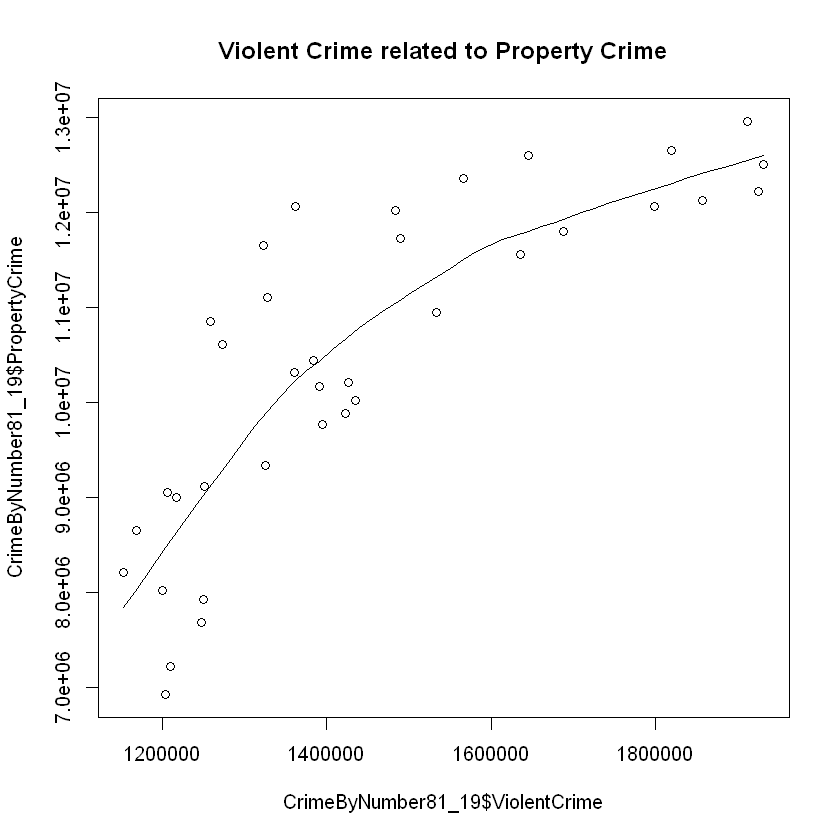

In [35]:
scatter.smooth(x= CrimeByNumber81_19$ViolentCrime, y= CrimeByNumber81_19$PropertyCrime,
               main = "Violent Crime related to Property Crime")

In [42]:
## That looks remarkably linear.

## Next Lets compare Murder/NonNegligentHomicide

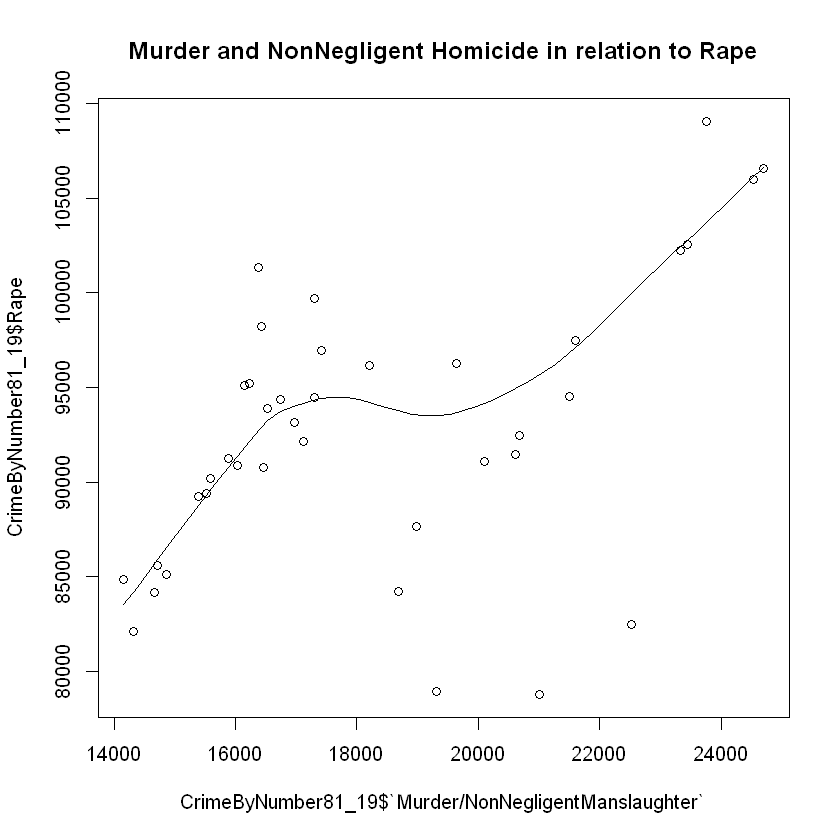

In [43]:
# Murder/NonNegligentHomicide and Rape
scatter.smooth(x= CrimeByNumber81_19$`Murder/NonNegligentManslaughter`, y= CrimeByNumber81_19$Rape, main= "Murder and NonNegligent Homicide in relation to Rape")

## And now lets look at Murder/NonNegligentManslaughter in relation to Property Crime

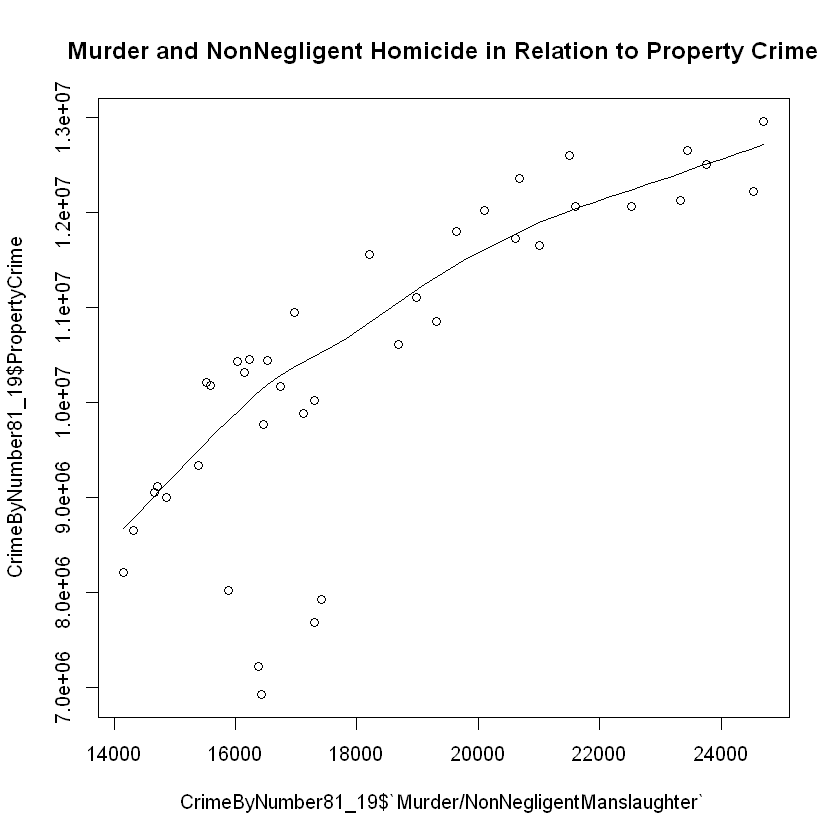

In [45]:
scatter.smooth(x= CrimeByNumber81_19$`Murder/NonNegligentManslaughter`, y = CrimeByNumber81_19$PropertyCrime, main= "Murder and NonNegligent Homicide in Relation to Property Crime")

In [46]:
## Thats a whole lot more linear than I would have originally predicted

# Lets look at some histograms of the data and see if we can view any trends

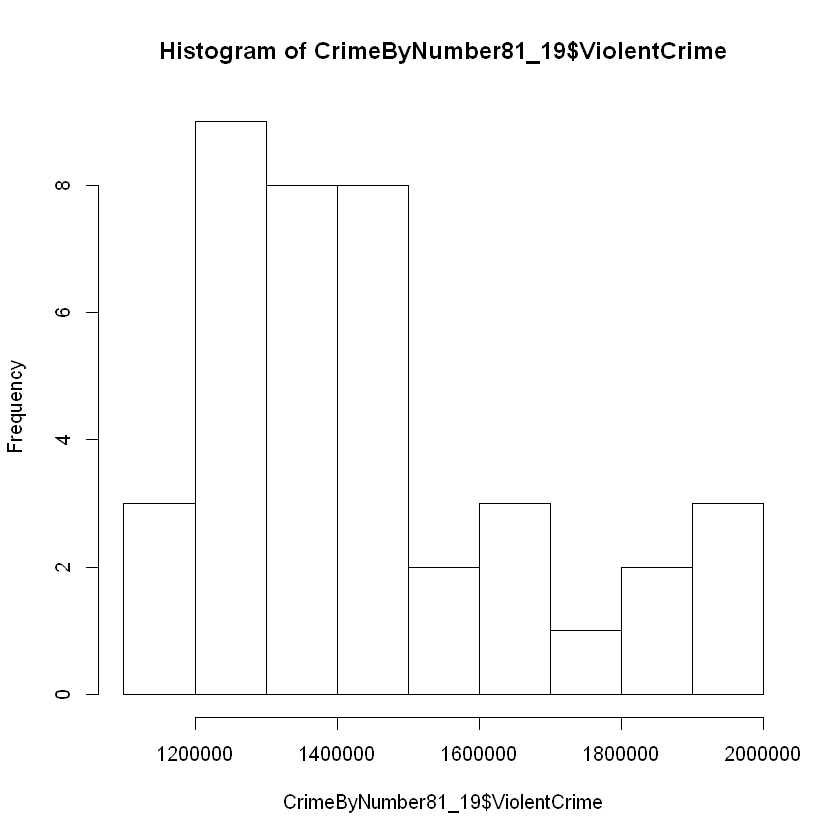

In [49]:
hist(CrimeByNumber81_19$ViolentCrime)

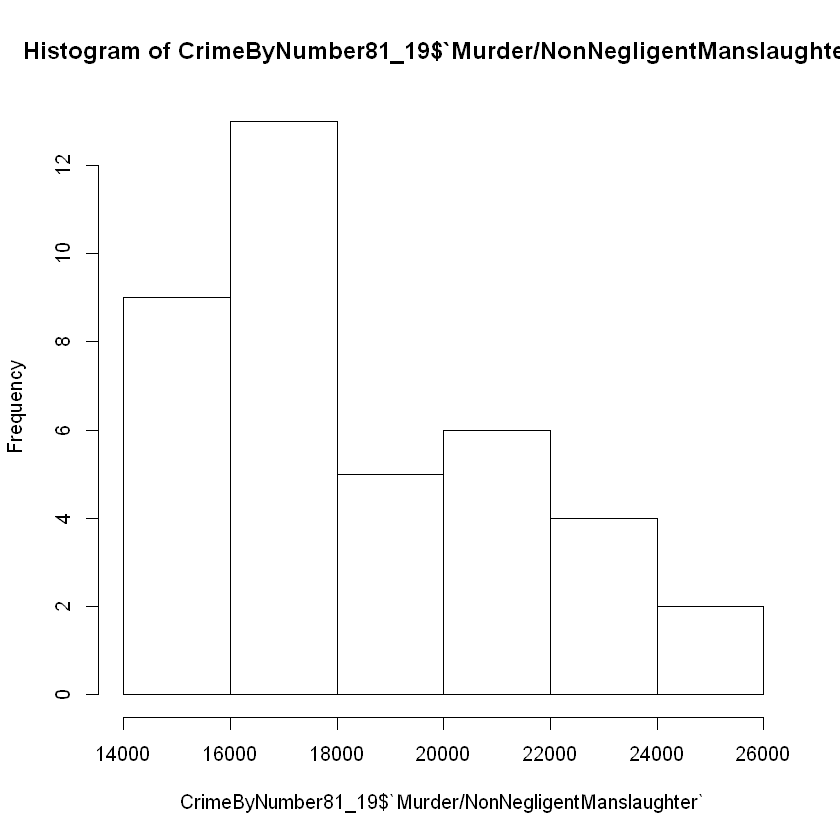

In [50]:
hist(CrimeByNumber81_19$`Murder/NonNegligentManslaughter`)

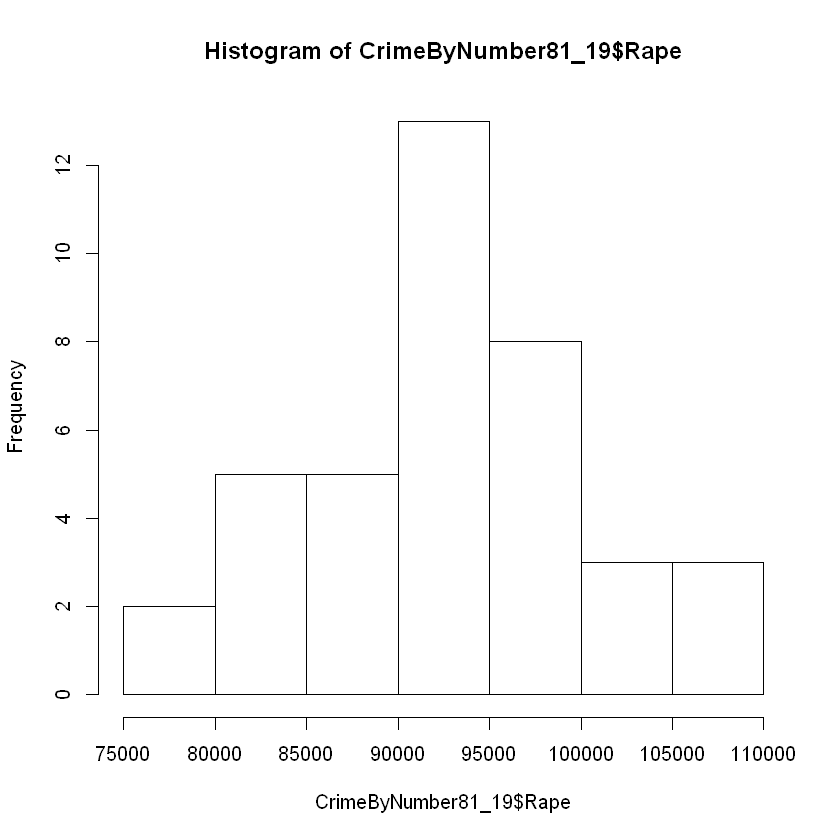

In [51]:
hist(CrimeByNumber81_19$Rape)

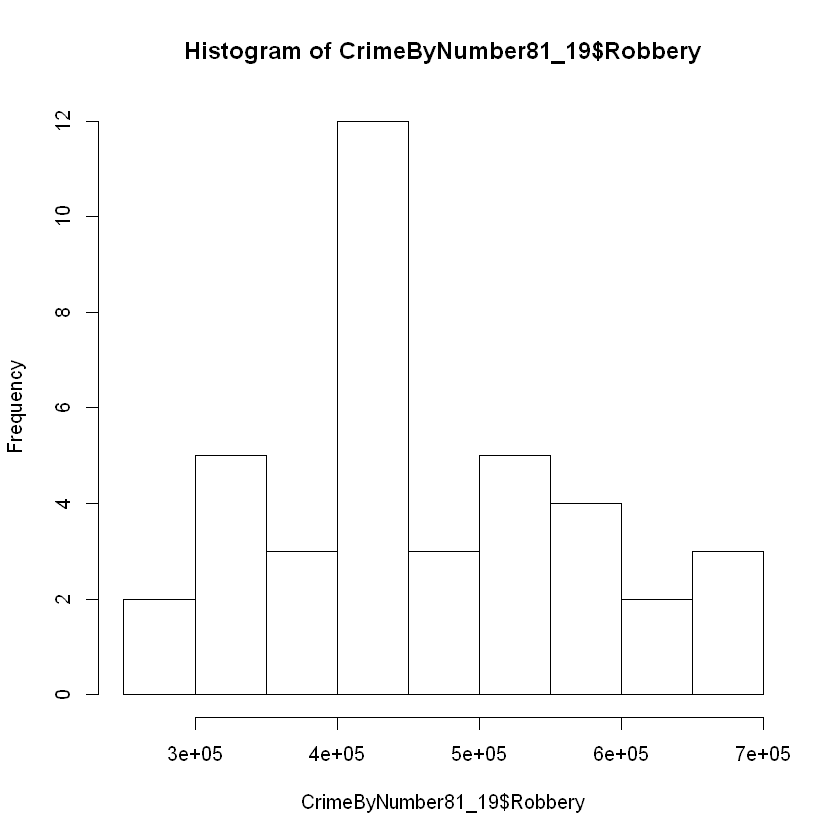

In [52]:
hist(CrimeByNumber81_19$Robbery)

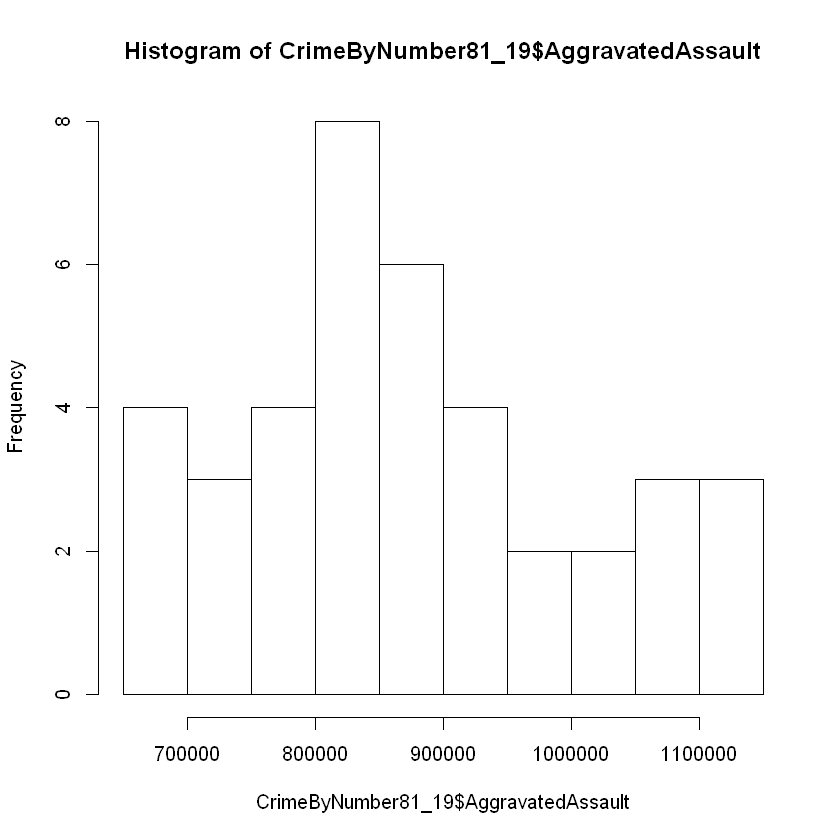

In [53]:
hist(CrimeByNumber81_19$AggravatedAssault)

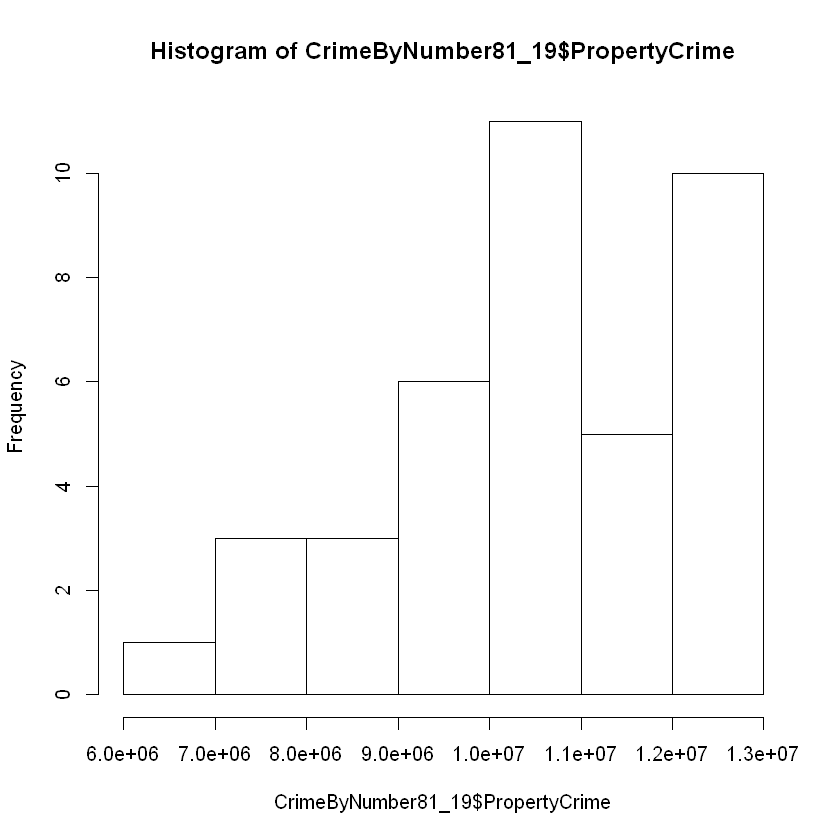

In [54]:
hist(CrimeByNumber81_19$PropertyCrime)

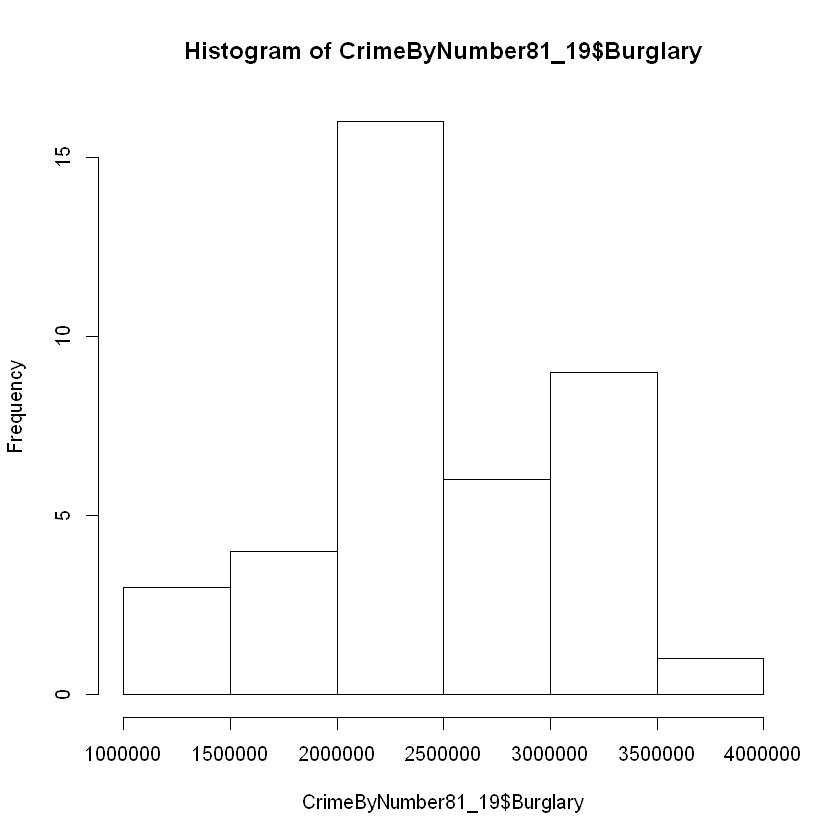

In [55]:
hist(CrimeByNumber81_19$Burglary)

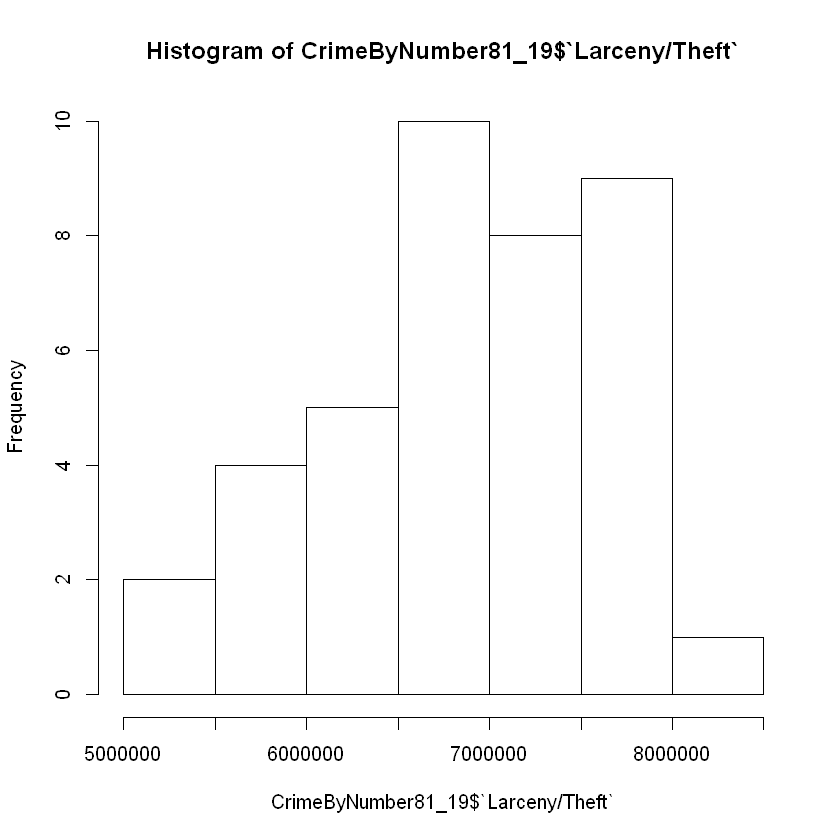

In [56]:
hist(CrimeByNumber81_19$`Larceny/Theft`)

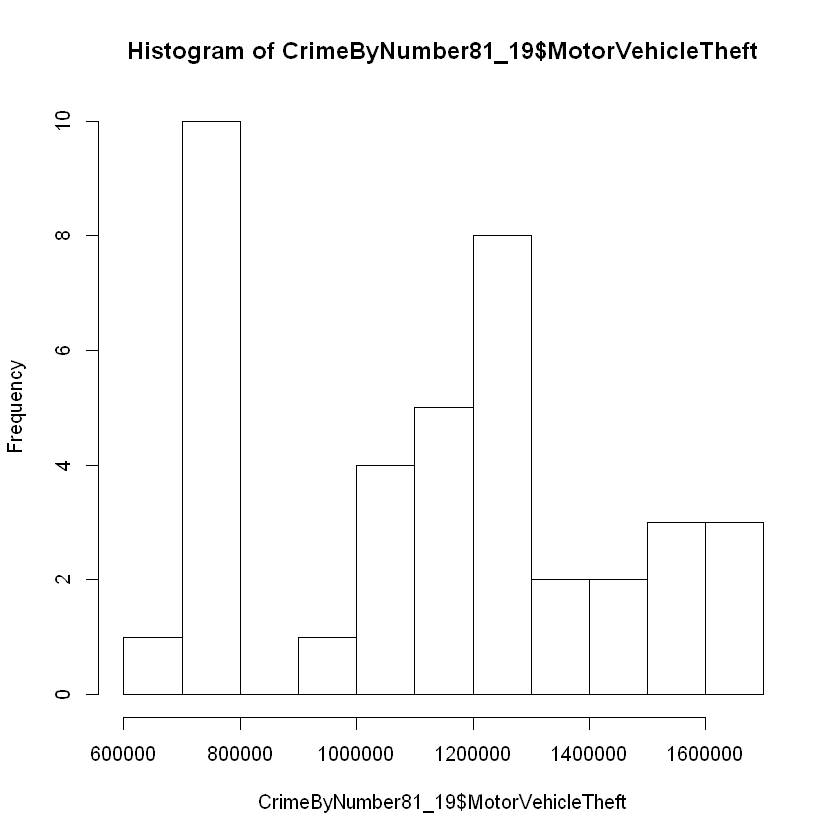

In [57]:
hist(CrimeByNumber81_19$MotorVehicleTheft)